In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
credit = pd.read_csv("C:/HIRAL VASHI/COMODO/Data Science/netflow_day-02.csv",sep=",",index_col=False, nrows=5)


In [4]:
credit.head(5)


,time,duration,srcDevice,dstDevice,protocol,srcPort,dstPort,srcPackets,dstPackets,srcBytes,dstBytes
0,118781,5580,Comp364445,Comp547245,17,Port05507,Port46272,0,755065,0,1042329018
1,118783,6976,Comp450942,Comp829338,6,Port03137,445,1665,1108,300810,250408
2,118785,14178,IP564116,Comp141988,17,5060,5060,1866,0,1477041,0
3,118785,28147,IP564116,Comp141988,17,5060,5060,3326,0,2656305,0
4,118785,48507,IP564116,Comp141988,17,5060,5060,5423,0,4388449,0


In [5]:
X = credit[[' srcPackets',' dstPackets',' srcBytes',' dstBytes']]


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

In [7]:
X_normalized.columns = [' srcPackets',' dstPackets',' srcBytes',' dstBytes']

In [8]:
from sklearn.ensemble import IsolationForest
iforest = IsolationForest()
iforest.fit(X_normalized)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [9]:
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [10]:
X['Anomaly_Class'] = Anomaly_Class
X['Anomaly_Score'] = Anomaly_Score

In [11]:
X.groupby('Anomaly_Class')[['Anomaly_Score']].count()

,Anomaly_Score
Anomaly_Class,
-1,51
1,449


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2A3FDF518>,
      dtype=object)

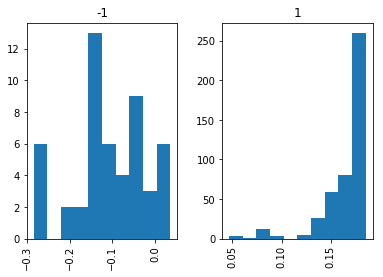

In [12]:
X['Anomaly_Score'].hist(by=X['Anomaly_Class'])


In [13]:
X['Anomaly_Score'].describe()


count    500.000000
mean       0.138695
std        0.090218
min       -0.284354
25%        0.151337
50%        0.171887
75%        0.181413
max        0.185349
Name: Anomaly_Score, dtype: float64

In [14]:
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(contamination=0.2)
iforest.fit(X_normalized)

IsolationForest(bootstrap=False, contamination=0.2, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [15]:
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(contamination=0.2)
iforest.fit(X_normalized)

IsolationForest(bootstrap=False, contamination=0.2, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [16]:
X['Anomaly_Class_Contamination'] = Anomaly_Class
X['Anomaly_Score_Contamination'] = Anomaly_Score

In [17]:
X.groupby('Anomaly_Class_Contamination')[['Anomaly_Score_Contamination']].count()

,Anomaly_Score_Contamination
Anomaly_Class_Contamination,
-1,51
1,449


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2A401C400>,
      dtype=object)

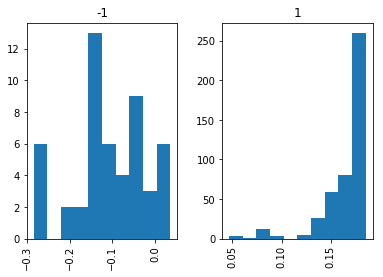

In [18]:
X['Anomaly_Score_Contamination'].hist(by=X['Anomaly_Class_Contamination'])


In [19]:
X['Anomaly_Score_Contamination'].describe()


count    500.000000
mean       0.138695
std        0.090218
min       -0.284354
25%        0.151337
50%        0.171887
75%        0.181413
max        0.185349
Name: Anomaly_Score_Contamination, dtype: float64

In [20]:
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(bootstrap=True)
iforest.fit(X_normalized)

IsolationForest(bootstrap=True, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [31]:
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [32]:
X['Anomaly_Class_Bootstrap'] = Anomaly_Class
X['Anomaly_Score_Bootstrap'] = Anomaly_Score

In [33]:
X.groupby('Anomaly_Class_Bootstrap')[['Anomaly_Score_Bootstrap']].count()


,Anomaly_Score_Bootstrap
Anomaly_Class_Bootstrap,
-1,50
1,450


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2A4787518>,
      dtype=object)

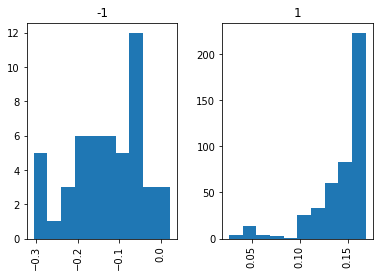

In [34]:
X['Anomaly_Score_Bootstrap'].hist(by=X['Anomaly_Class_Bootstrap'])


In [35]:
X.head()


,srcPackets,dstPackets,srcBytes,dstBytes,Anomaly_Class,Anomaly_Score,Anomaly_Class_Contamination,Anomaly_Score_Contamination,Anomaly_Class_Bootstrap,Anomaly_Score_Bootstrap
0,0,755065,0,1042329018,-1,0.018037,-1,0.018037,-1,0.012890
1,1665,1108,300810,250408,1,0.181334,1,0.181334,1,0.164034
2,1866,0,1477041,0,1,0.181360,1,0.181360,1,0.165519
3,3326,0,2656305,0,1,0.181193,1,0.181193,1,0.164575
4,5423,0,4388449,0,1,0.179229,1,0.179229,1,0.159160


In [36]:
X[['Anomaly_Score_Contamination','Anomaly_Score_Bootstrap','Anomaly_Score']].head().sort_values(['Anomaly_Score_Contamination'], ascending=[1])

,Anomaly_Score_Contamination,Anomaly_Score_Bootstrap,Anomaly_Score
0,0.018037,0.012890,0.018037
4,0.179229,0.159160,0.179229
3,0.181193,0.164575,0.181193
1,0.181334,0.164034,0.181334
2,0.181360,0.165519,0.181360
